In [1]:
#第一类勒索病毒恶意软件EDA
import pandas as pd
data_df1=pd.read_csv('label1.csv')

In [2]:
data_df1.head()

,file_id,label,api,tid,return_value,index
0,503,1,InternetOpenA,2700,13369348,0
1,503,1,InternetOpenUrlA,2700,0,1
2,503,1,InternetCloseHandle,2700,1,2
3,503,1,InternetCloseHandle,2700,0,3
4,503,1,OpenSCManagerA,2700,12248408,4


In [3]:
api=data_df1['api'].value_counts()

In [4]:
api[0:10]

RegQueryValueExW           175638
NtClose                    144504
LdrGetProcedureAddress     132036
NtReadFile                  72638
RegOpenKeyExW               56280
RegCloseKey                 56060
SetFilePointerEx            47312
NtWriteFile                 39918
NtAllocateVirtualMemory     39273
GetSystemMetrics            33397
Name: api, dtype: int64

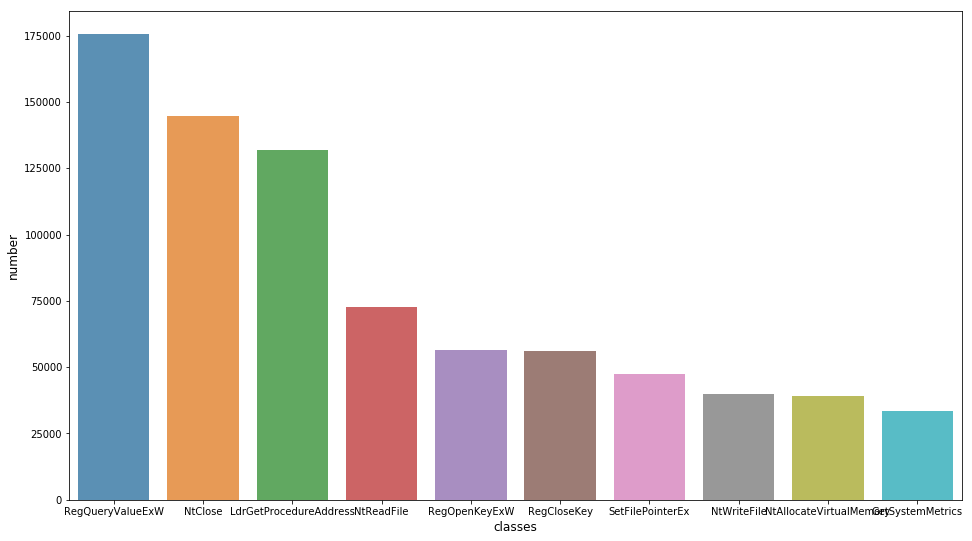

In [6]:
#所有文件中top api调用数量
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
sns.barplot(api.index[0:10],api.values[0:10],alpha=0.8)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

In [7]:
every_file=data_df1.groupby('file_id')['api'].count().sort_values(ascending=False)

In [8]:
every_file[0:10]

file_id
5778     143664
28987    108896
85320     28776
25384     26687
49922     25499
77152     24996
6441      24597
12271     24464
47180     22873
78463     22856
Name: api, dtype: int64

In [9]:
import numpy
index=[]
for i in range(287):
    index.append(i)
index=numpy.array(index)

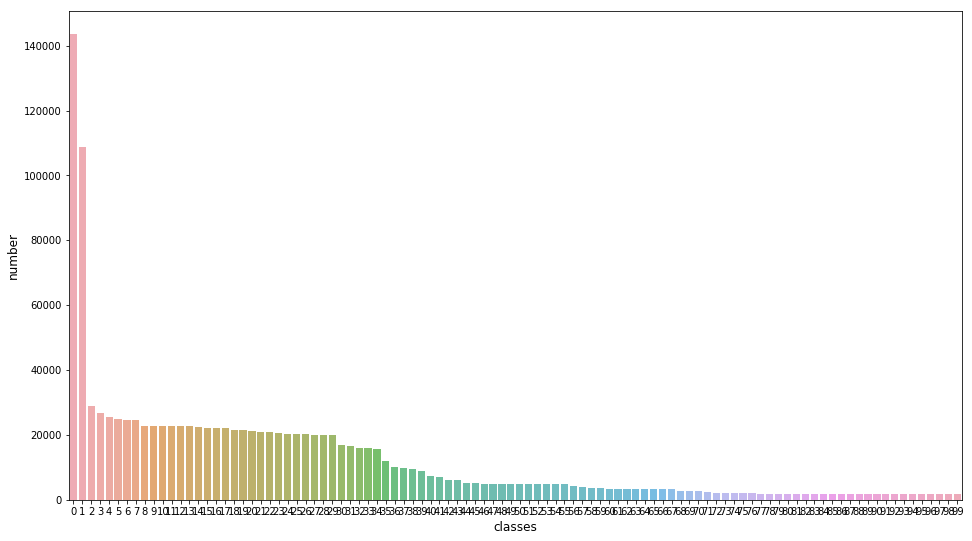

In [10]:
#每个文件调用api数量分布图，每个文件之间对比
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

plt.figure(figsize=(16,9))
sns.barplot(index[0:100],every_file.values[0:100],alpha=0.8)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

/home/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


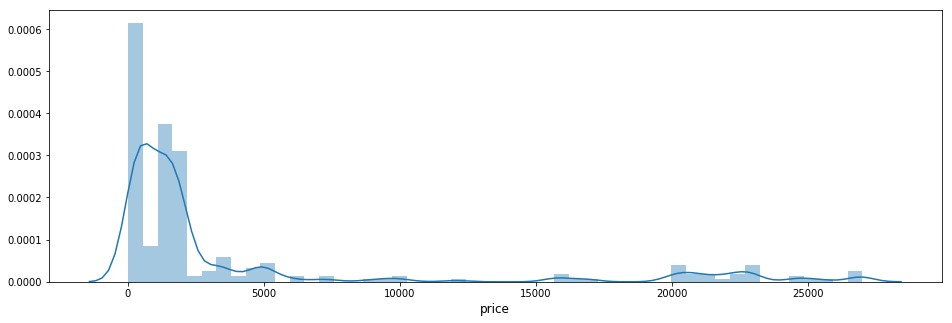

In [11]:
#文件调用api数量分布直方图
ulimit = numpy.percentile(every_file.values,99)
every_file.loc[[every_file.iloc[i]>ulimit for i in range(len(every_file))]]=ulimit
plt.figure(figsize=(16,5))
sns.distplot(every_file.values,bins=50,kde=True)
plt.xlabel('price',fontsize=12)
plt.show()

In [12]:
#第一个文件散点图
file_1=data_df1[data_df1['file_id']==503]

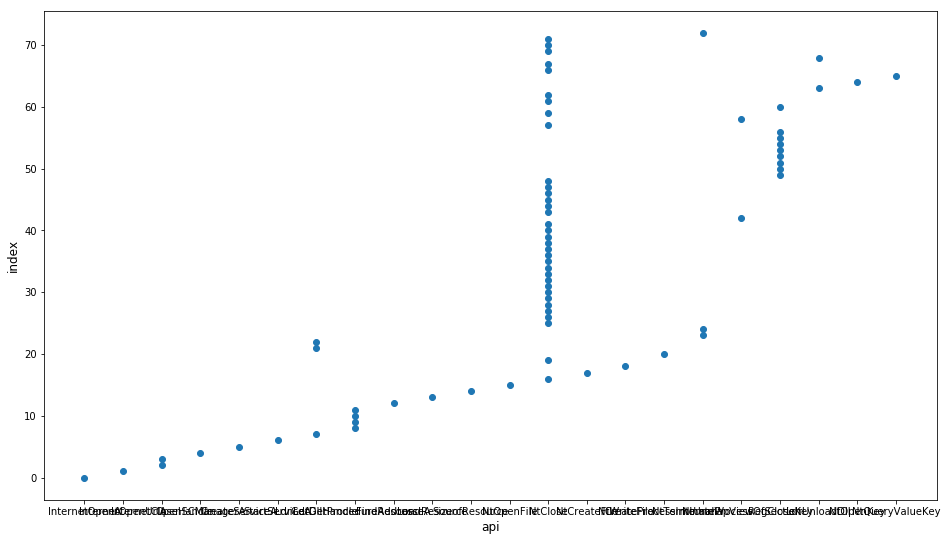

In [13]:
plt.figure(figsize=(16,9))
plt.scatter((file_1['api'].values),range(file_1.shape[0]))
plt.xlabel('api',fontsize=12)
plt.ylabel('index',fontsize=12)
plt.show()